In [321]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.datasets import load_iris, load_wine

import lib.baseline as baseline
import lib.util as util
from lib.baycon import baycon_explainer
from lib.dice import dice_explainer

from lib.eval.eval_metrics import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [322]:
X, true_y = load_iris(return_X_y=True)
km = KMeans(n_clusters=3)
y = km.fit_predict(X)

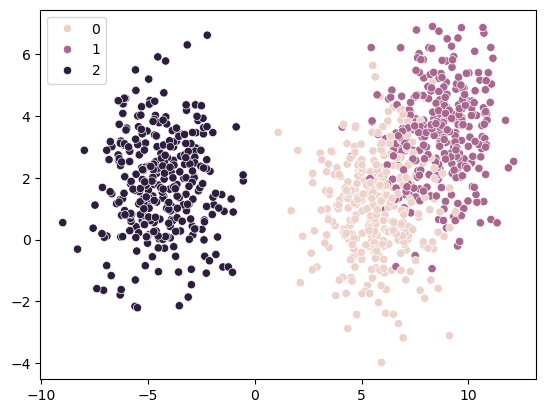

In [323]:
X, y = make_blobs(centers=3, cluster_std=1.5, n_features=2, n_samples=1000)
eX = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [324]:
idx = 9
print(f"init point cluster: {y[idx]}")
target_cluster = 2

init point cluster: 0


In [325]:
explainer = dice_explainer(15)
# classifier = MLPClassifier(hidden_layer_sizes=(6,4))
# classifier = LogisticRegression()
classifier = RandomForestClassifier(n_estimators=1)
cf = baseline.baseline_explainer(X, y, classifier, explainer, idx, target_cluster=target_cluster, binary=False)

Done training classifier. Score: 0.957


100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

Found 15 counterfactuals


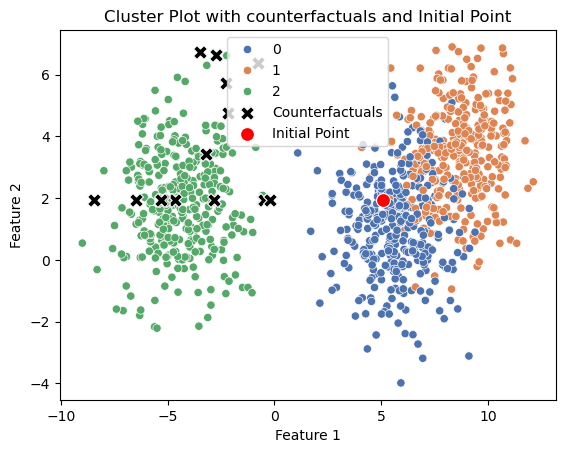

In [326]:
util.plot_cluster_cf(X, y, cf, idx)

In [327]:
print(f"minimality: {cf_minimality(cf, X[idx])}")
print(f"similarity: {cf_similarity(cf, X[idx])}")
print("plausibility", cf_plausibility(cf, target_cluster, X, y))